<a href="https://colab.research.google.com/github/Anubhav3084/ML/blob/main/ML%20from%20scratch/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Approach**
* Substract the mean from X
* Calculate Covariance Cov(X,X)
* Calculate eigenvectors and eigenvalues of covariance matrix
* Sort the eigenvectors according to their eigenvalues in descending order
* Choose first k eigenvectors and that will be the new k dimensions
* Transform the original n dimensional data points into k dimension

In [1]:
import numpy as np

In [2]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        
    def fit(self, X):
        # zero mean
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance
        # X -> 1 row = 1 sample, columns = features
        cov = np.cov(X.T)

        # eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # eigen vectors are returned as column vectors -> 1 column = 1 eigenvector

        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store only the 1st k eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

### **Test and Visualize**

#### **IRIS data**

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
data = datasets.load_iris()
X = data.data
y = data.target
print(X.shape, y.shape)

(150, 4) (150,)


Shape of X:  (150, 4)
Shape of transformed X:  (150, 2)


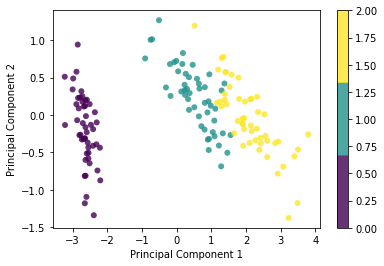

In [5]:
# project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print('Shape of X: ', X.shape)
print('Shape of transformed X: ', X_projected.shape)

x1 = X_projected[:,0]
x2 = X_projected[:,1]
plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

#### **MNIST data**

In [6]:
from keras.datasets import mnist

(X, y), (_, __) = mnist.load_data()
print(X.shape, y.shape)
X = np.reshape(X, (60000,784))
print(X.shape, y.shape)

(60000, 28, 28) (60000,)
(60000, 784) (60000,)


Shape of X:  (60000, 784)
Shape of transformed X:  (60000, 2)


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


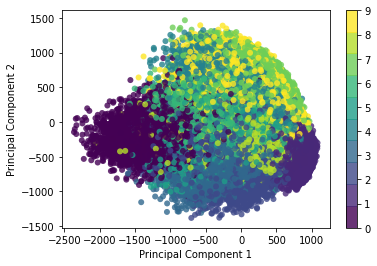

In [7]:
# project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print('Shape of X: ', X.shape)
print('Shape of transformed X: ', X_projected.shape)

x1 = X_projected[:,0]
x2 = X_projected[:,1]
plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()